In [1]:
# This code calculates the vertical DEM shift using the Nuth and Kääb point cloud coregistration
# activate the xdem_dev environment

import geoutils as gu
import numpy as np
from numpy.linalg import inv
import pandas as pd

import xdem

In [2]:
# **Inputs**
path = 'Sites/RCEW/DEMs/'
meanmin = 'min'

icesat_file = 'RCEW-ICESat2-ATL03-min'
DEM_file = 'RCEW_1m_WGS84UTM11_WGS84_11m'
slope_file = 'RCEW_1m_WGS84UTM11_WGS84-slope'
aspect_file = 'RCEW_1m_WGS84UTM11_WGS84-aspect'

In [3]:
# **files**
reference_dem = xdem.DEM(path + icesat_file + '.tif')
dem_to_be_aligned = xdem.DEM(path + DEM_file + '.tif')
dem_elev = xdem.DEM(path + DEM_file + '.tif')
dem_slope = xdem.DEM(path + slope_file + '.tif')
dem_aspect = xdem.DEM(path + aspect_file + '.tif')

/Users/karinazikan/opt/anaconda3/envs/XDEM/lib/python3.11/site-packages/geoutils/raster/raster.py:1427: UserWarning: Setting default nodata -99999 to mask non-finite values found in the array, as no nodata value was defined.
  warnings.warn(
/Users/karinazikan/opt/anaconda3/envs/XDEM/lib/python3.11/site-packages/geoutils/raster/raster.py:1427: UserWarning: Setting default nodata -99999 to mask non-finite values found in the array, as no nodata value was defined.
  warnings.warn(
/Users/karinazikan/opt/anaconda3/envs/XDEM/lib/python3.11/site-packages/geoutils/raster/raster.py:1427: UserWarning: Setting default nodata -99999 to mask non-finite values found in the array, as no nodata value was defined.
  warnings.warn(
/Users/karinazikan/opt/anaconda3/envs/XDEM/lib/python3.11/site-packages/geoutils/raster/raster.py:1427: UserWarning: Setting default nodata -99999 to mask non-finite values found in the array, as no nodata value was defined.
  warnings.warn(
/Users/karinazikan/opt/anaconda3

In [4]:
## **difference before coregistration**
#diff_before = reference_dem - dem_to_be_aligned
#diff_before.show(cmap="coolwarm_r", vmin=-1, vmax=1, cbar_title="Elevation change (m)")

## Coreggister DEM to IS2 (simpler method)

In [14]:
# **Nuth and Kääb coregistration**

nuth_kaab = xdem.coreg.NuthKaab()
nuth_kaab.fit(reference_dem,dem_to_be_aligned)

In [15]:
# **apply coregistration shift**
aligned_dem = nuth_kaab.apply(dem_elev)
#aligned_slope = nuth_kaab.apply(dem_slope)
#aligned_aspect = nuth_kaab.apply(dem_aspect)

In [16]:
nuth_kaab.to_matrix()

array([[ 1.        ,  0.        ,  0.        ,  1.47300941],
       [ 0.        ,  1.        ,  0.        , -2.7701371 ],
       [ 0.        ,  0.        ,  1.        , -1.13940926],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [7]:
# **Plot the difference between DTMs**
#diff = dem_to_be_aligned - aligned_dem   
#diff.show(cmap="coolwarm_r", vmin=-1, vmax=1, cbar_title="Elevation change (m)")

In [8]:
# **export coregistered DEMs**
#aligned_dem.save(path + DEM_file + '_' + meanmin + '_CoRegAlt.tif')
#aligned_slope.save(path + slope_file + '_' + meanmin +'_CoRegAlt.tif')
#aligned_aspect.save(path + aspect_file + '_' + meanmin +'_CoRegAlt.tif')

## 

## Coreggister IS2 to DEM (more complicated method)

In [7]:
# **Nuth and Kääb coregistration**
nuth_kaab = xdem.coreg.NuthKaab()

nuth_kaab.fit(dem_to_be_aligned, reference_dem)

In [8]:
#save the transform as a matrix
a = nuth_kaab.to_matrix() 
a

array([[ 1.        ,  0.        ,  0.        , -2.53929234],
       [ 0.        ,  1.        ,  0.        ,  2.00065457],
       [ 0.        ,  0.        ,  1.        ,  1.19090831],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [9]:
#Invert transphormation matrix
ainv = inv(a)
ainv

array([[ 1.        ,  0.        ,  0.        ,  2.53929234],
       [ 0.        ,  1.        ,  0.        , -2.00065457],
       [ 0.        ,  0.        ,  1.        , -1.19090831],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [10]:
# **Make new cogrestration from inverted transformation matrix**
nuth_kaab2= xdem.coreg.affine.AffineCoreg()
nuth_kaab2._meta["matrix"] = ainv #manually set transformation matrix to desired matrix
c = nuth_kaab2._meta.get("matrix") #double check the matrix
c

array([[ 1.        ,  0.        ,  0.        ,  2.53929234],
       [ 0.        ,  1.        ,  0.        , -2.00065457],
       [ 0.        ,  0.        ,  1.        , -1.19090831],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [12]:
# **apply coregistration shift**
aligned_dem2 = nuth_kaab2.apply(dem_elev)

In [ ]:
aligned_slope = nuth_kaab2.apply(dem_slope)

In [14]:
aligned_aspect = nuth_kaab2.apply(dem_aspect)

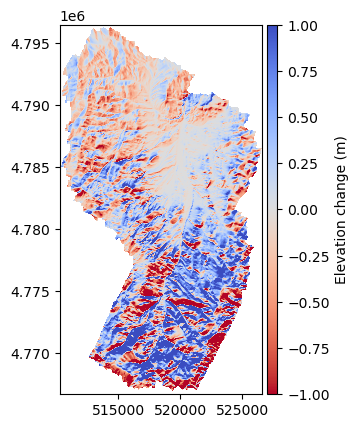

In [17]:
# **Plot the difference between DTMs**
# this can be used to check that the transformation did what you expect
diff = aligned_dem2 - aligned_dem
diff.show(cmap="coolwarm_r", vmin=-1, vmax=1, cbar_title="Elevation change (m)")

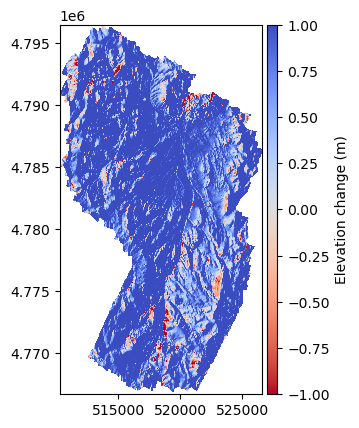

In [15]:
# **Plot the difference between DTMs**
# this can be used to check that the transformation did what you expect
diff = dem_to_be_aligned - aligned_dem
diff.show(cmap="coolwarm_r", vmin=-1, vmax=1, cbar_title="Elevation change (m)")

In [16]:
# **export coregistered DEMs**
aligned_dem.save(path + DEM_file + '_' + meanmin + '_11m_CoRegAlt.tif')
aligned_slope.save(path + slope_file + '_' + meanmin +'_11m_CoRegAlt.tif')
aligned_aspect.save(path + aspect_file + '_' + meanmin +'_11m_CoRegAlt.tif')